In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('watson_healthcare_modified.csv')

In [3]:
df.shape

(1676, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,1.456796e+06,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,...,2.718377,80.0,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,2.487486e+05,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,...,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235832e+06,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.464606e+06,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.667992e+06,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
pd.set_option('display.max_columns',None)
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,Male,61,2,2,Other,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,Female,56,3,1,Other,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,1,Male,40,3,1,Nurse,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
df[df.duplicated()]#no duplicatedd values

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [8]:
df.drop('EmployeeID', inplace=True, axis=1)#id is of no use

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

# Attrition
target variable

In [10]:
df.Attrition.value_counts()

No     1477
Yes     199
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

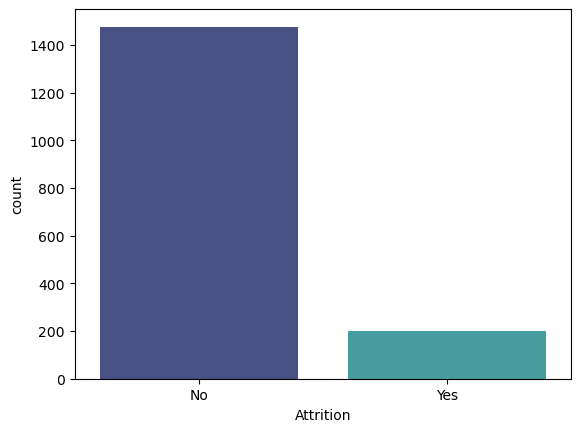

In [11]:
sns.countplot(df.Attrition,palette='mako')

## Age

In [12]:
df.Age.value_counts()

35    88
34    85
29    82
31    82
36    81
32    68
38    68
40    64
30    63
33    62
28    59
27    59
37    57
42    52
39    47
26    46
45    45
41    43
46    38
43    37
44    36
50    33
25    30
49    29
24    29
47    28
55    25
53    25
48    23
52    21
54    20
51    20
22    18
23    17
58    17
56    15
21    14
20    13
19    10
59    10
18     8
60     5
57     4
Name: Age, dtype: int64

In [13]:
df.Age.nunique()

43

<AxesSubplot:xlabel='Age', ylabel='Density'>

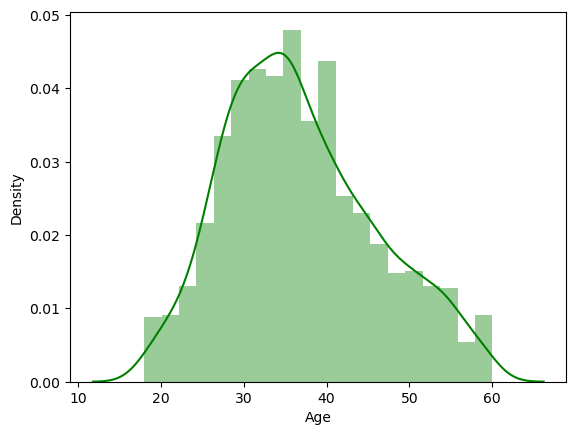

In [14]:
sns.distplot(df.Age,color='g')

<AxesSubplot:xlabel='Age'>

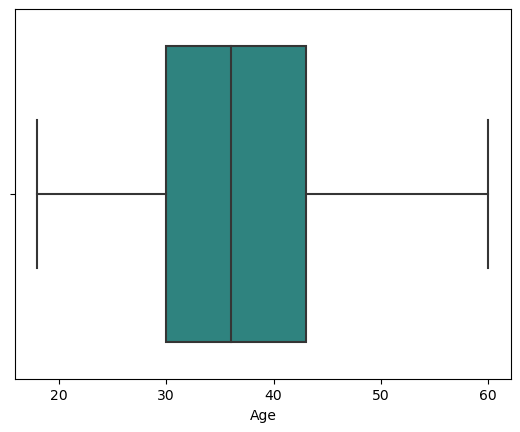

In [15]:
sns.boxplot(df.Age,palette='viridis')

## DailyRate

In [16]:
df.DailyRate.value_counts()

691     7
1329    7
1082    6
444     6
530     6
       ..
1126    1
974     1
905     1
1151    1
1102    1
Name: DailyRate, Length: 886, dtype: int64

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

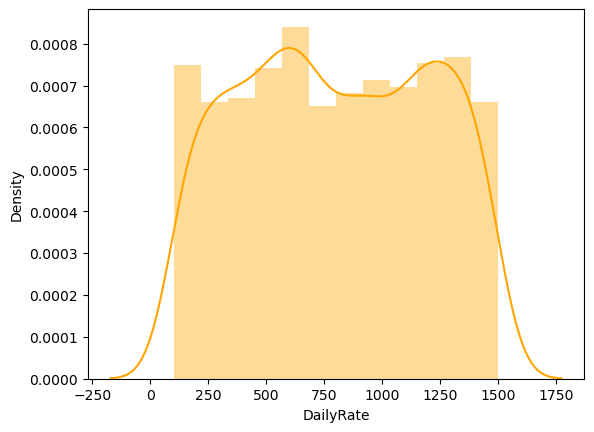

In [17]:
sns.distplot(df.DailyRate,color='orange')

<AxesSubplot:xlabel='DailyRate'>

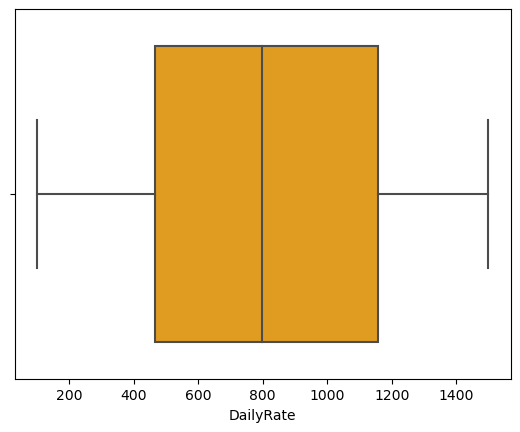

In [18]:
sns.boxplot(df.DailyRate,color='orange')

## Education

In [19]:
df.Education.value_counts()#ordnal 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

3    655
4    447
2    322
1    196
5     56
Name: Education, dtype: int64

In [20]:
df.Education.replace({1 :'Below College', 2 :'College', 3 :'Bachelor', 4: 'Master', 5 :'Doctor'},inplace=True)

<AxesSubplot:xlabel='Education', ylabel='count'>

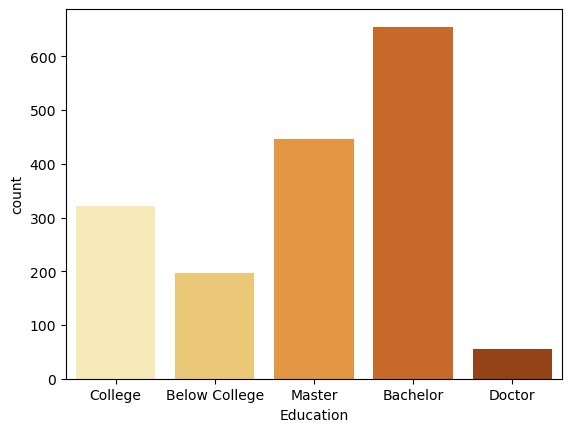

In [21]:
sns.countplot(df.Education,palette='YlOrBr')

<AxesSubplot:xlabel='Education', ylabel='count'>

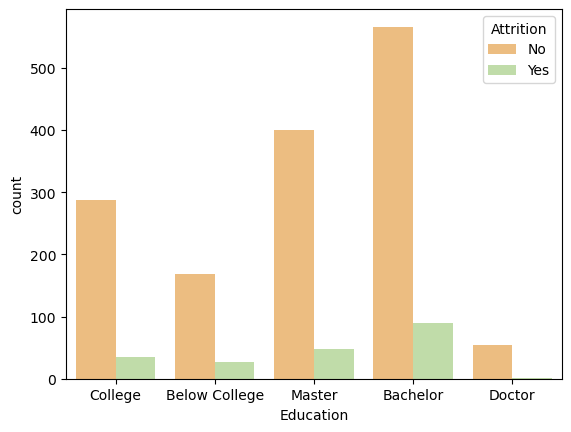

In [22]:
sns.countplot(x='Education',hue='Attrition',data=df,palette='Spectral')

# EmployeeCount

In [23]:
df.EmployeeCount.value_counts()

1    1676
Name: EmployeeCount, dtype: int64

In [24]:
df.drop('EmployeeCount',axis=1,inplace=True)

## EnvironmentSatisfaction

In [25]:
df.EnvironmentSatisfaction.value_counts()#orinal variable 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

3    512
4    508
1    330
2    326
Name: EnvironmentSatisfaction, dtype: int64

In [26]:
df.EnvironmentSatisfaction.replace({1 :'Low', 2 :'Medium' ,3 :'High' ,4 :'Very High'},inplace=True)

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

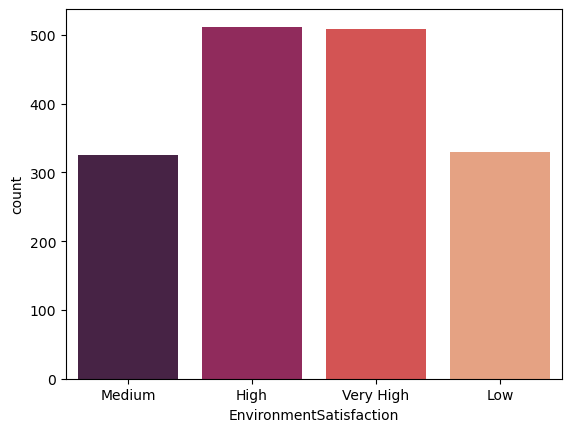

In [27]:
sns.countplot(df.EnvironmentSatisfaction,palette='rocket')

## HourlyRate

In [28]:
df.HourlyRate.value_counts()#orinal variable

48    35
84    34
79    33
66    33
42    33
      ..
50    17
93    17
68    17
38    16
34    14
Name: HourlyRate, Length: 71, dtype: int64

<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

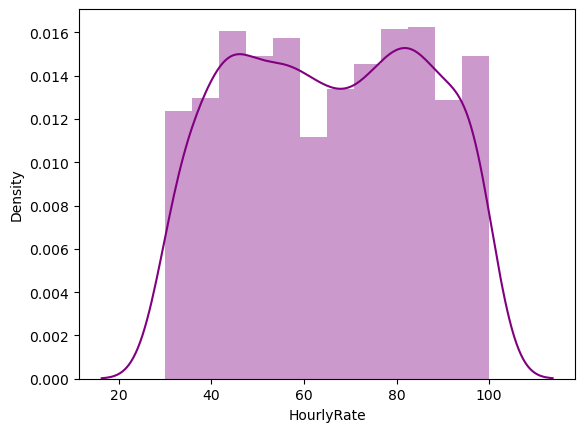

In [29]:
sns.distplot(df.HourlyRate,color='purple')

<AxesSubplot:xlabel='HourlyRate'>

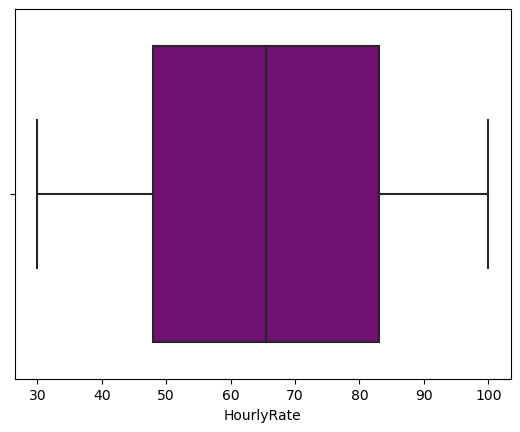

In [30]:
sns.boxplot(df.HourlyRate,color='purple')

## JobInvolvement

In [31]:
df.JobInvolvement.value_counts()#orinal variable 

3    983
2    433
4    164
1     96
Name: JobInvolvement, dtype: int64

In [32]:
df.JobInvolvement.replace({1 :'Low', 2 :'Medium' ,3 :'High' ,4 :'Very High'},inplace=True)

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

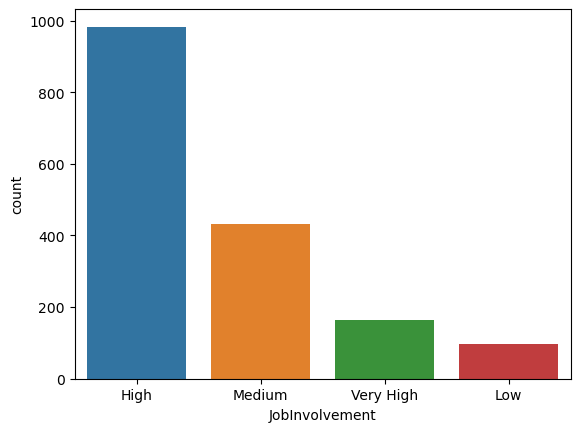

In [33]:
sns.countplot(df.JobInvolvement)

## JobLevel

In [34]:
df.JobLevel.value_counts()#orinal variable

1    621
2    606
3    246
4    122
5     81
Name: JobLevel, dtype: int64

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

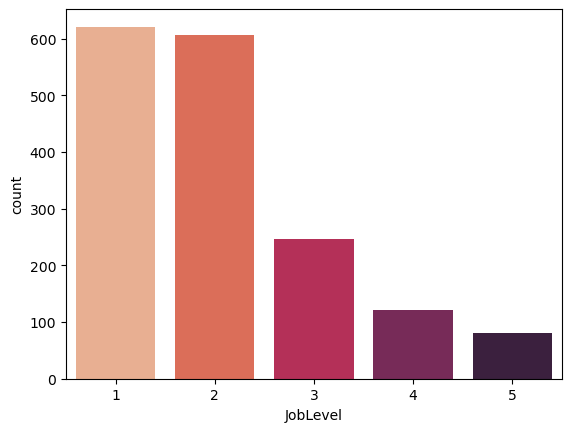

In [35]:
sns.countplot(df.JobLevel,palette='rocket_r')

# JobSatisfaction

In [36]:
df.JobSatisfaction.value_counts()#orinal variable

4    530
3    507
1    329
2    310
Name: JobSatisfaction, dtype: int64

In [37]:
df.JobSatisfaction.replace({1 :'Low', 2 :'Medium' ,3 :'High' ,4 :'Very High'},inplace=True)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

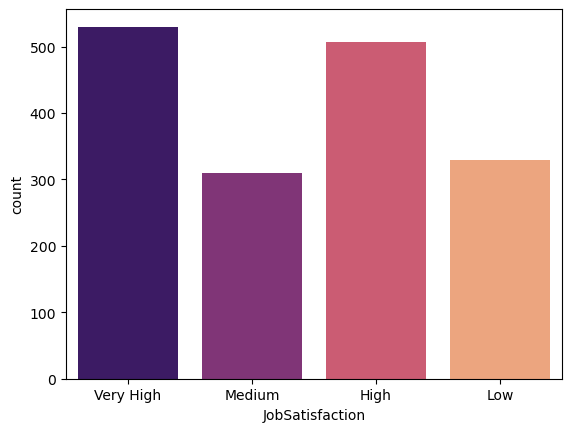

In [38]:
sns.countplot(df.JobSatisfaction,palette='magma')

## MonthlyIncome

In [39]:
df.MonthlyIncome.value_counts()#orinal variable

2741     4
2340     4
5562     4
2342     4
5993     3
        ..
10475    1
4960     1
7625     1
6796     1
2836     1
Name: MonthlyIncome, Length: 1349, dtype: int64

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

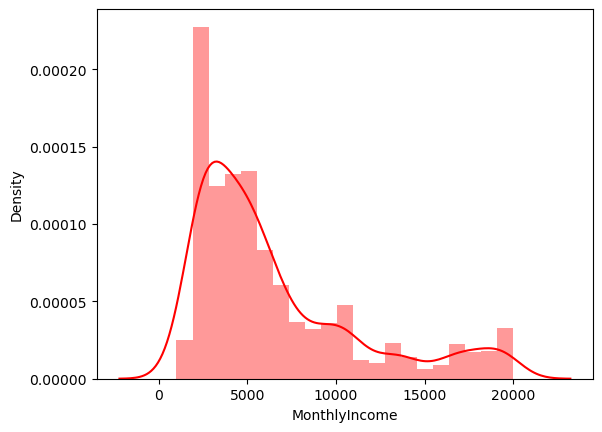

In [40]:
sns.distplot(df.MonthlyIncome,color='r')

<AxesSubplot:xlabel='MonthlyIncome'>

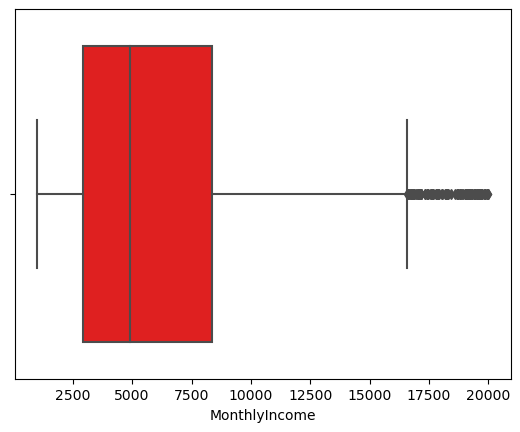

In [41]:
sns.boxplot(df.MonthlyIncome,color='r')

In [42]:
q3=df.MonthlyIncome.quantile(0.75)
q1=df.MonthlyIncome.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)

In [43]:
df.MonthlyIncome=np.where(df.MonthlyIncome>upper,upper,df.MonthlyIncome)

<AxesSubplot:xlabel='MonthlyIncome'>

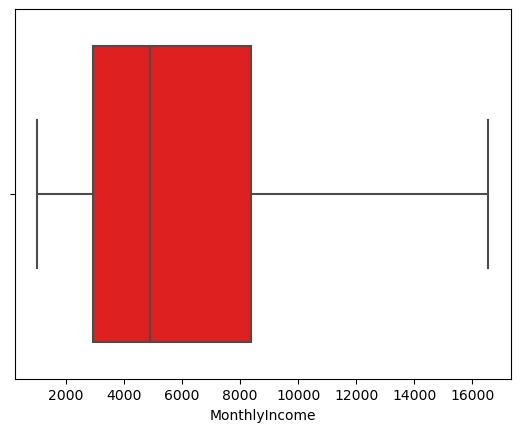

In [44]:
sns.boxplot(df.MonthlyIncome,color='r')

# MonthlyRate

In [45]:
df.MonthlyRate.value_counts()#orinal variable

4223     4
19373    4
11652    3
9150     3
7744     3
        ..
17654    1
15232    1
18959    1
7791     1
26997    1
Name: MonthlyRate, Length: 1427, dtype: int64

<AxesSubplot:xlabel='MonthlyRate', ylabel='Density'>

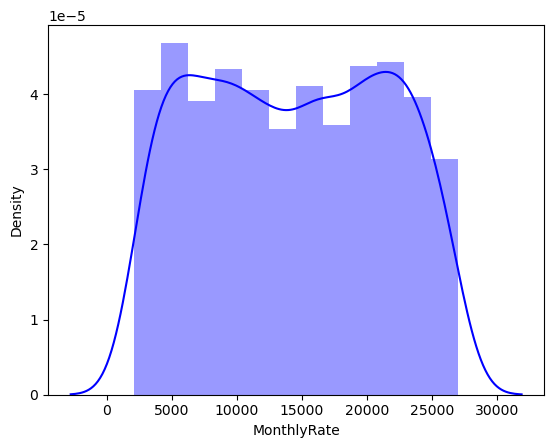

In [46]:
sns.distplot(df.MonthlyRate,color='b')

<AxesSubplot:xlabel='MonthlyRate'>

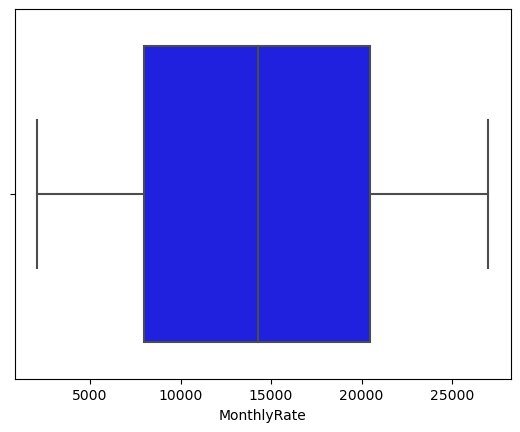

In [47]:
sns.boxplot(df.MonthlyRate,color='b')

## NumCompaniesWorked

In [48]:
df.NumCompaniesWorked.value_counts()#orinal variable

1    601
0    223
3    180
2    173
4    156
7     84
6     79
5     70
9     59
8     51
Name: NumCompaniesWorked, dtype: int64

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

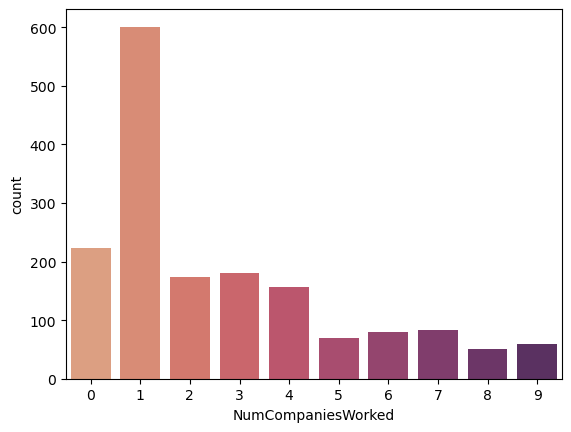

In [49]:
sns.countplot(df.NumCompaniesWorked,palette='flare')

## PercentSalaryHike

In [50]:
df.PercentSalaryHike.value_counts()#orinal variable

11    241
13    236
14    229
12    227
15    114
18    103
17     93
19     92
16     89
20     63
22     60
21     54
23     31
24     23
25     21
Name: PercentSalaryHike, dtype: int64

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Density'>

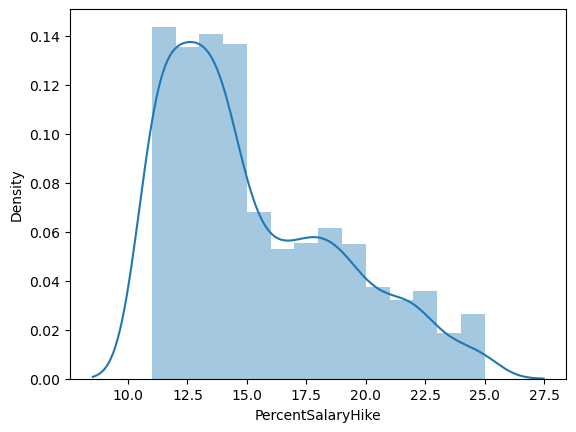

In [51]:
sns.distplot(df.PercentSalaryHike)

<AxesSubplot:xlabel='PercentSalaryHike'>

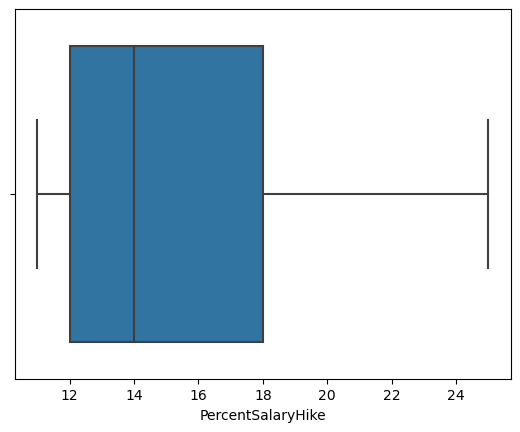

In [52]:
sns.boxplot(df.PercentSalaryHike)

## PerformanceRating

In [53]:
df.PerformanceRating.value_counts()#orinal variable

3    1424
4     252
Name: PerformanceRating, dtype: int64

In [54]:
df.PerformanceRating.replace({1 :'Low', 2: 'Good', 3 :'Excellent', 4 :'Outstanding'},inplace=True)

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

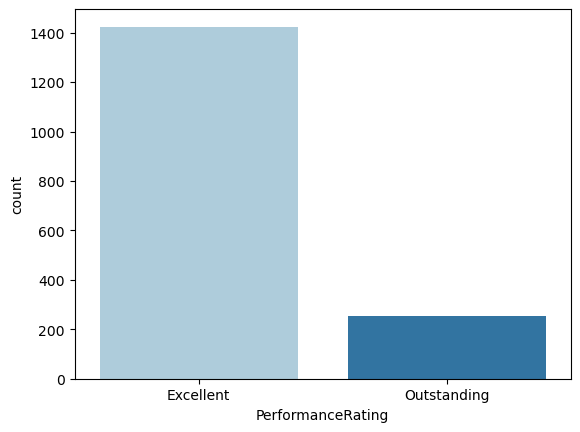

In [55]:
sns.countplot(df.PerformanceRating,palette='Paired')

## RelationshipSatisfaction

In [56]:
df.RelationshipSatisfaction.value_counts()#orinal variable

3    526
4    494
2    346
1    310
Name: RelationshipSatisfaction, dtype: int64

In [57]:
df.RelationshipSatisfaction.replace({1 :'Low', 2 :'Medium' ,3 :'High' ,4 :'Very High'},inplace=True)

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

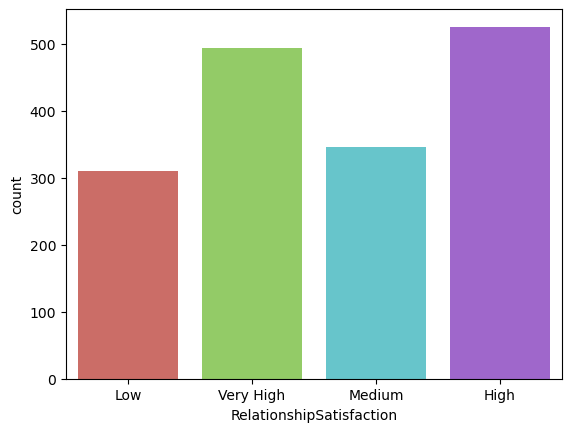

In [58]:
sns.countplot(df.RelationshipSatisfaction,palette='hls')

# StandardHours

In [59]:
df.StandardHours.value_counts()

80    1676
Name: StandardHours, dtype: int64

In [60]:
df.drop('StandardHours',inplace=True,axis=1)#there is only one value

## Shift

In [61]:
df.Shift.value_counts()#orinal variable

0    708
1    684
2    185
3     99
Name: Shift, dtype: int64

<AxesSubplot:xlabel='Shift', ylabel='count'>

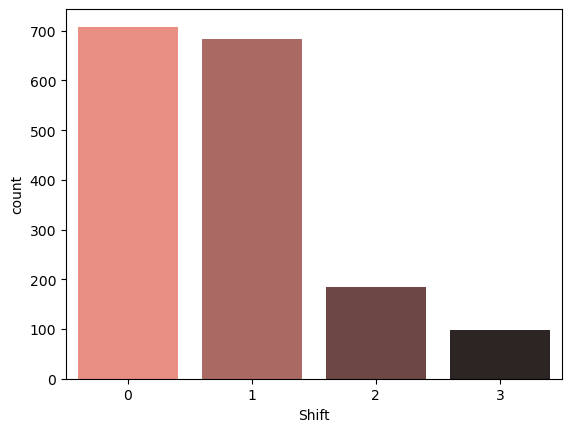

In [62]:
sns.countplot(df.Shift,palette='dark:salmon_r')

# TotalWorkingYears

In [63]:
df.TotalWorkingYears.value_counts()#orinal variable

10    233
6     140
8     123
9     108
5     100
1      94
7      88
4      70
12     51
3      50
15     47
17     40
16     40
11     39
13     39
21     39
2      36
14     35
20     34
18     30
23     27
22     25
19     25
24     22
25     17
28     16
26     15
31     12
29     12
32     11
0      11
30      8
33      8
36      7
27      7
34      6
37      4
35      4
40      2
38      1
Name: TotalWorkingYears, dtype: int64

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

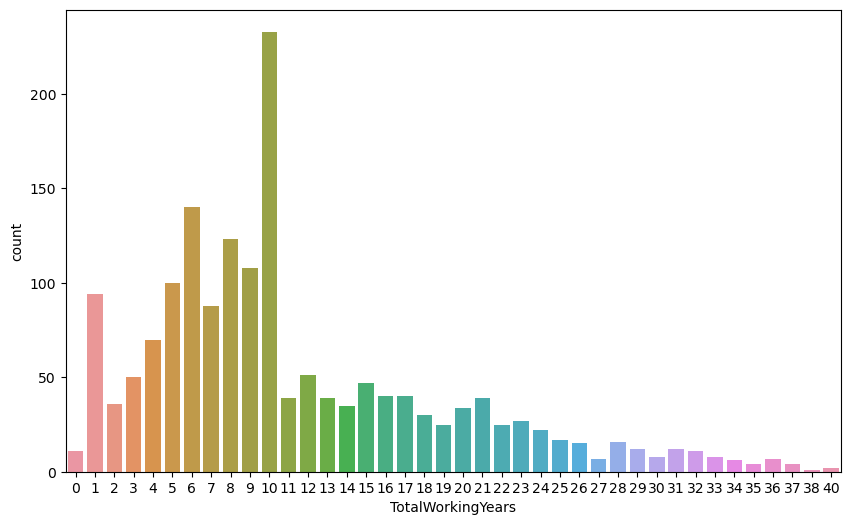

In [64]:
plt.figure(figsize=(10,6))
sns.countplot(df.TotalWorkingYears)

# TrainingTimesLastYear

In [65]:
df.TrainingTimesLastYear.value_counts()#orinal variable

2    611
3    567
4    143
5    137
1     84
6     73
0     61
Name: TrainingTimesLastYear, dtype: int64

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

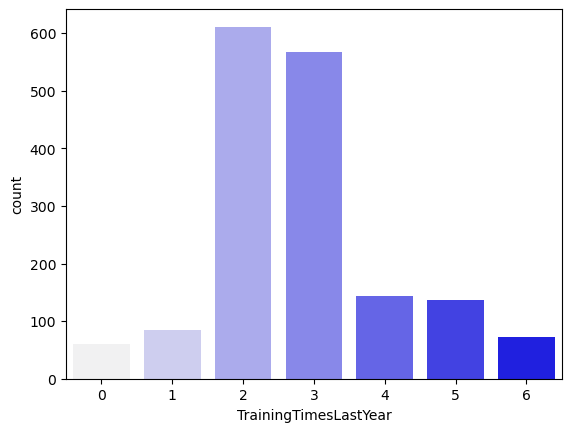

In [66]:
sns.countplot(df.TrainingTimesLastYear,palette='light:b')

# WorkLifeBalance

In [67]:
df.WorkLifeBalance.value_counts()#orinal variable

3    1028
2     385
4     173
1      90
Name: WorkLifeBalance, dtype: int64

In [68]:
df.WorkLifeBalance.replace({1 :'Bad', 2 :'Good', 3: 'Better', 4 :'Best'},inplace=True)

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

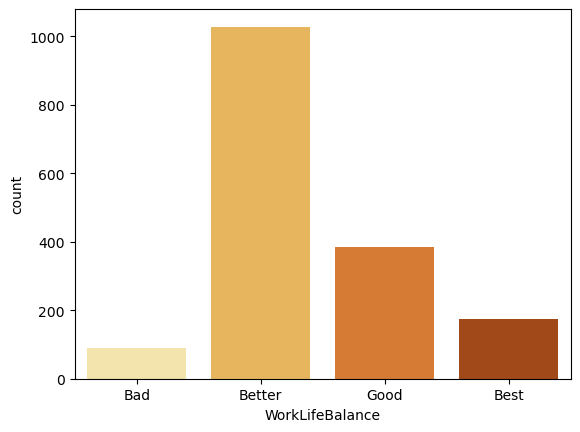

In [69]:
sns.countplot(df.WorkLifeBalance,palette='YlOrBr')

# YearsAtCompany

In [70]:
df.YearsAtCompany.value_counts()#orinal variable

5     219
1     195
3     152
2     146
10    137
4     120
7     104
9      94
8      93
6      86
0      46
11     37
20     32
13     28
15     23
14     20
22     19
12     17
21     17
19     14
18     13
16     12
17     12
24      7
33      6
25      5
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: YearsAtCompany, dtype: int64

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

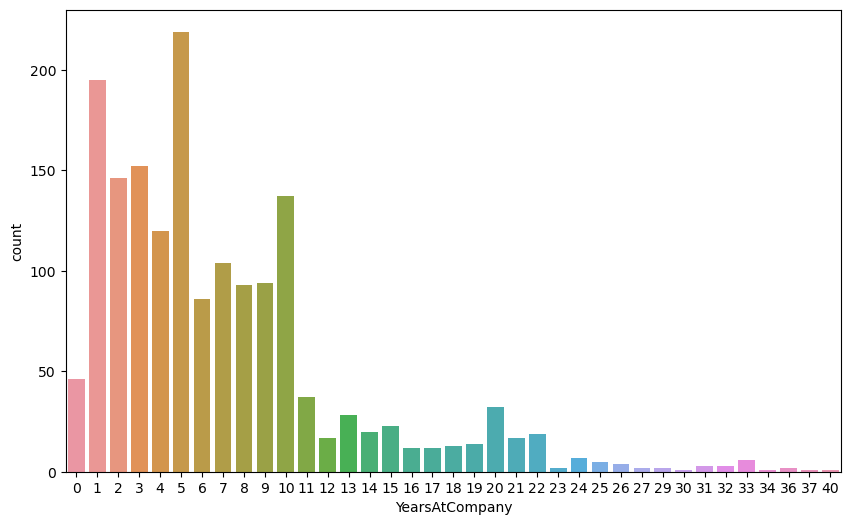

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(df.YearsAtCompany)

## YearsInCurrentRole

In [72]:
df.YearsInCurrentRole.value_counts()#orinal variable

2     434
0     273
7     257
3     146
4     114
8     104
9      79
1      61
5      43
6      43
10     33
11     26
13     16
14     12
12     11
15      9
16      7
17      5
18      3
Name: YearsInCurrentRole, dtype: int64

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

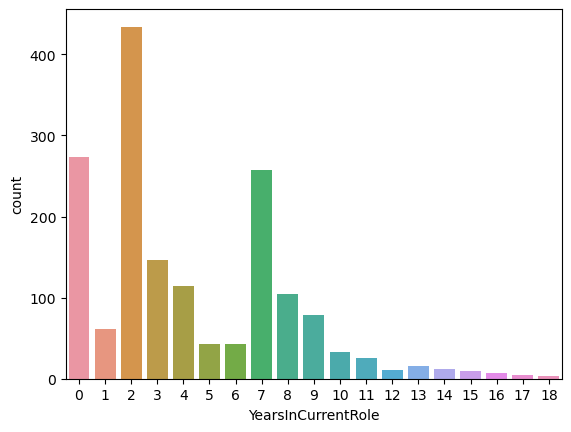

In [73]:
sns.countplot(df.YearsInCurrentRole)

## YearsSinceLastPromotion

In [74]:
df.YearsSinceLastPromotion.value_counts()#orinal variable

0     660
1     402
2     186
7      83
3      66
4      63
5      50
6      41
11     30
8      21
9      20
15     15
13     12
12     11
14      9
10      7
Name: YearsSinceLastPromotion, dtype: int64

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

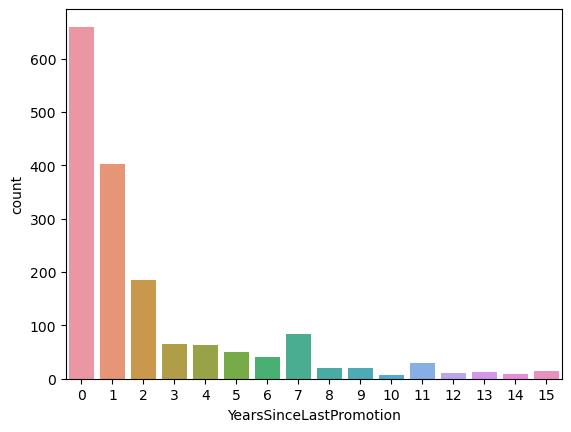

In [75]:
sns.countplot(df.YearsSinceLastPromotion)

# YearsWithCurrManager

In [76]:
df.YearsWithCurrManager.value_counts()#orinal variable

2     404
0     297
7     247
3     155
8     122
4     108
1      83
9      77
5      35
6      34
10     32
11     25
12     21
13     16
17      7
15      6
14      5
16      2
Name: YearsWithCurrManager, dtype: int64

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

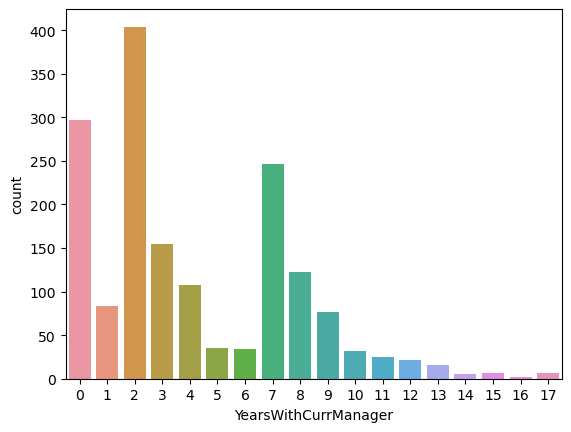

In [77]:
sns.countplot(df.YearsWithCurrManager)

# BusinessTravel

In [78]:
df.BusinessTravel.value_counts()#orinal variable

Travel_Rarely        1184
Travel_Frequently     320
Non-Travel            172
Name: BusinessTravel, dtype: int64

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

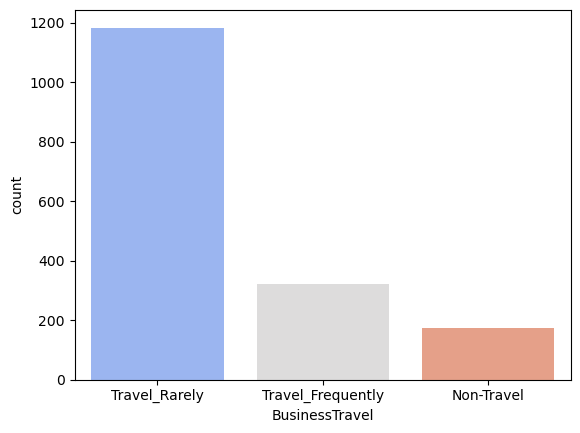

In [79]:
sns.countplot(df.BusinessTravel,palette='coolwarm')

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

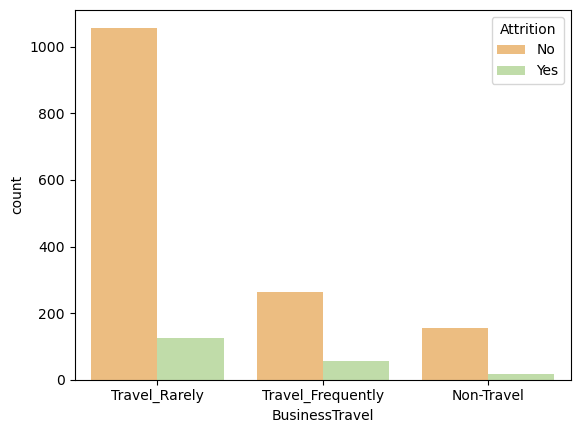

In [80]:
sns.countplot(x='BusinessTravel',hue='Attrition',data=df,palette='Spectral')#travel_rarely left the company

In [81]:
a=pd.crosstab(df.BusinessTravel,df.Attrition)
chi2_contingency(a)[1]

0.001119456597466221

# Department

In [82]:
df.Department.value_counts()

Maternity     796
Cardiology    531
Neurology     349
Name: Department, dtype: int64

<AxesSubplot:xlabel='Department', ylabel='count'>

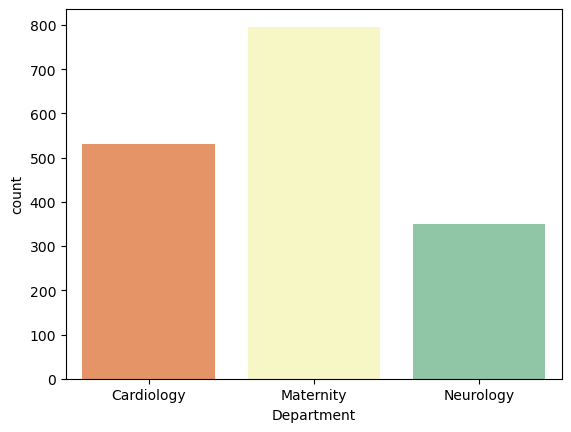

In [83]:
sns.countplot(df.Department,palette='Spectral')

<AxesSubplot:xlabel='Department', ylabel='count'>

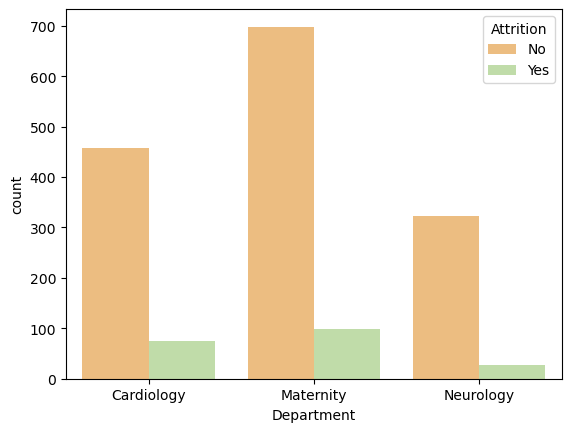

In [84]:
sns.countplot(x='Department',hue='Attrition',data=df,palette='Spectral')#employees who left in different depatments
# 'Maternity Deparment' is the department that modt of the employees left

In [85]:
a=pd.crosstab(df.Department,df.Attrition)
chi2_contingency(a)[1]

0.018194265980794714

## EducationField

In [86]:
df.EducationField.value_counts()

Life Sciences       697
Medical             524
Marketing           189
Technical Degree    149
Other                88
Human Resources      29
Name: EducationField, dtype: int64

<AxesSubplot:xlabel='EducationField', ylabel='count'>

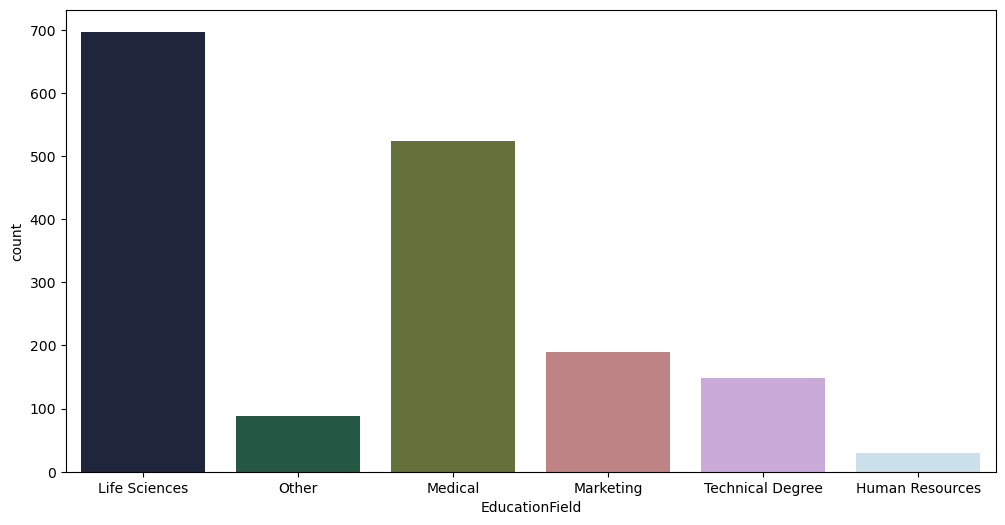

In [87]:
plt.figure(figsize=(12,6))
sns.countplot(df.EducationField,palette='cubehelix')

<AxesSubplot:xlabel='EducationField', ylabel='count'>

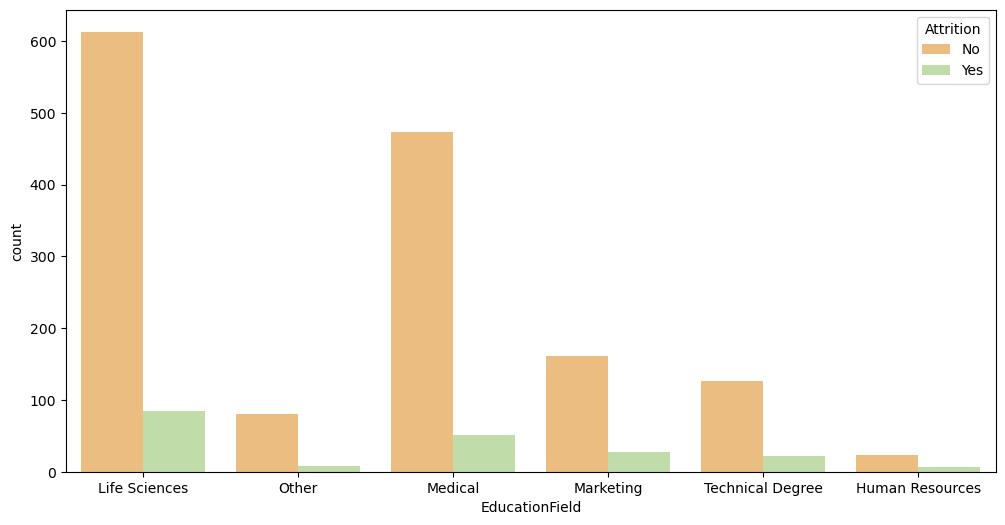

In [88]:
plt.figure(figsize=(12,6))
sns.countplot(x='EducationField',hue='Attrition',data=df,palette='Spectral')#most of the employee from 'Life Science'EducationField left the company

In [89]:
a=pd.crosstab(df.EducationField,df.Attrition)
chi2_contingency(a)[1]

0.1632877592033215

## Gender

In [90]:
df.Gender.value_counts()

Male      998
Female    678
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

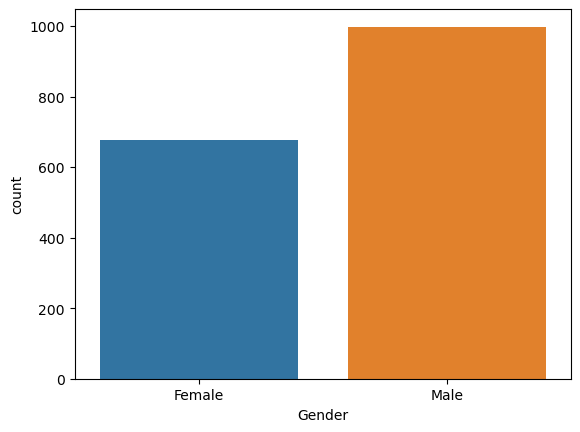

In [91]:
sns.countplot(df.Gender)

<AxesSubplot:xlabel='Gender', ylabel='count'>

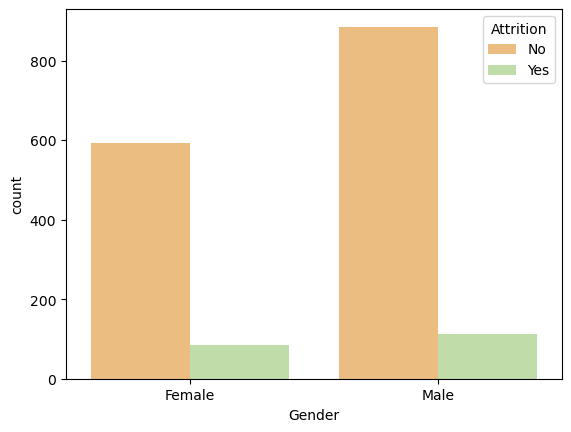

In [92]:
sns.countplot(x='Gender',hue='Attrition',data=df,palette='Spectral')

In [93]:
a=pd.crosstab(df.Gender,df.Attrition)
chi2_contingency(a)[1]

0.4419454127111361

# JobRole

In [94]:
df.JobRole.value_counts()

Nurse             822
Other             534
Therapist         189
Administrative    115
Admin              16
Name: JobRole, dtype: int64

<AxesSubplot:xlabel='JobRole', ylabel='count'>

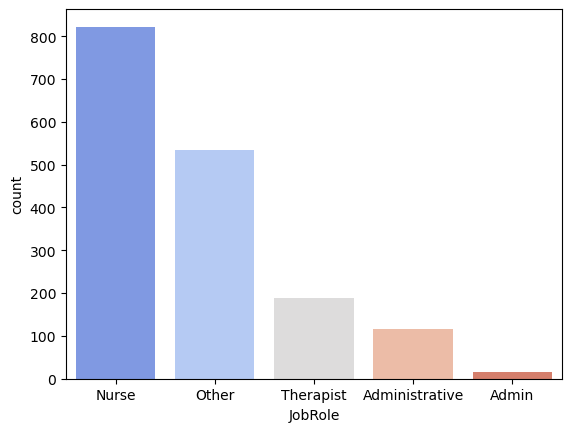

In [95]:
sns.countplot(df.JobRole,palette='coolwarm')

<AxesSubplot:xlabel='JobRole', ylabel='count'>

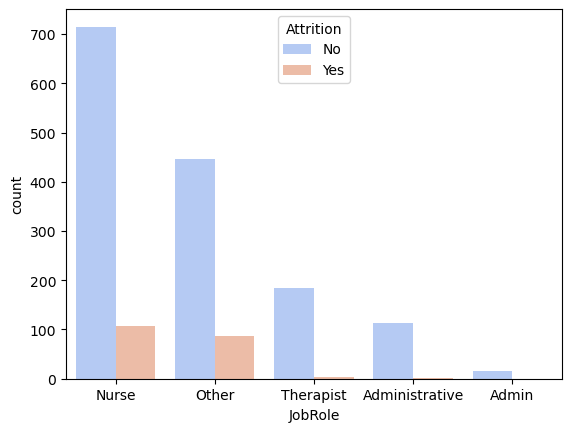

In [96]:
sns.countplot(x='JobRole',hue='Attrition',data=df,palette='coolwarm')#Nurse left the job

In [97]:
a=pd.crosstab(df.JobRole,df.Attrition)
chi2_contingency(a)[1]

7.58311282316894e-09

# MaritalStatus

In [98]:
df.MaritalStatus.value_counts()

Married     777
Single      522
Divorced    377
Name: MaritalStatus, dtype: int64

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

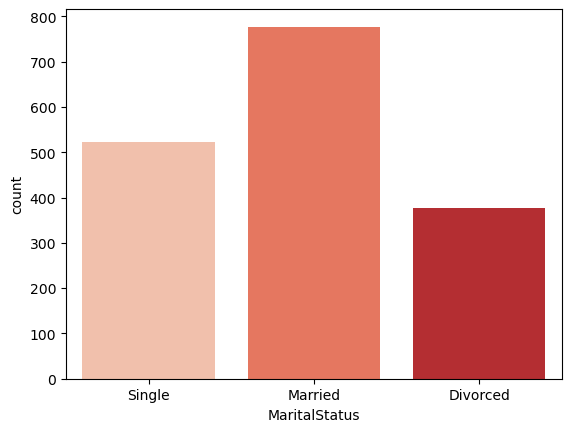

In [99]:
sns.countplot(df.MaritalStatus,palette='Reds')

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

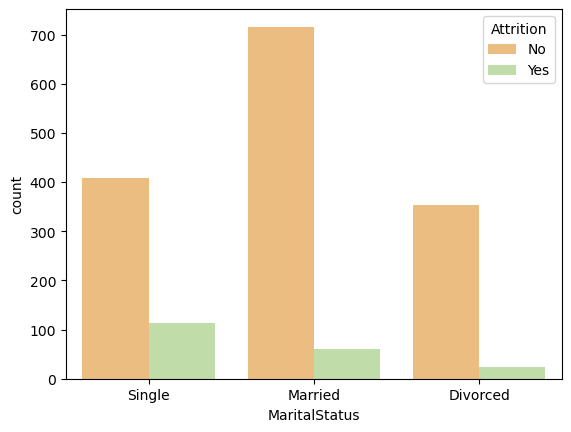

In [100]:
sns.countplot(x='MaritalStatus',hue='Attrition',data=df,palette='Spectral')#most of the singles left the job

In [101]:
a=pd.crosstab(df.MaritalStatus,df.Attrition)
chi2_contingency(a)[1]

1.816259262576239e-16

# Over18

In [102]:
df.Over18.value_counts()

Y    1676
Name: Over18, dtype: int64

In [103]:
df.drop('Over18',axis=1,inplace=True)#no use

# OverTime

In [104]:
df.OverTime.value_counts()

No     1200
Yes     476
Name: OverTime, dtype: int64

<AxesSubplot:xlabel='OverTime', ylabel='count'>

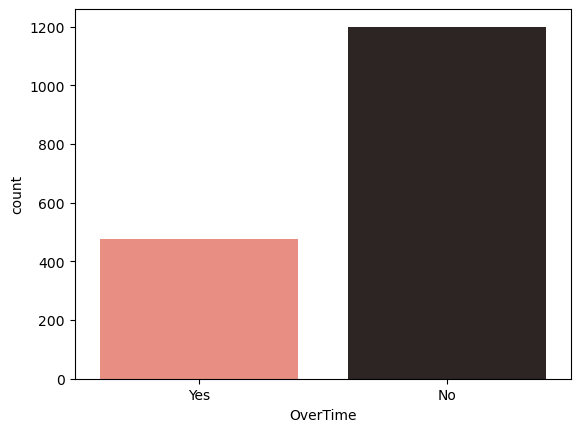

In [105]:
sns.countplot(df.OverTime,palette='dark:salmon_r')

<AxesSubplot:xlabel='OverTime', ylabel='count'>

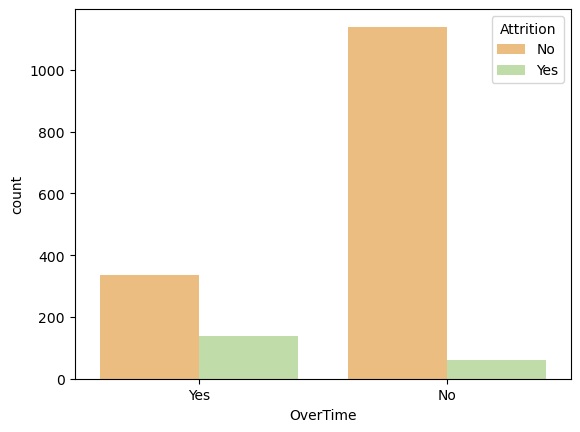

In [106]:
sns.countplot(x='OverTime',hue='Attrition',data=df,palette='Spectral')#most of the employees worked over time left the company

In [107]:
a=pd.crosstab(df.OverTime,df.Attrition)
chi2_contingency(a)[1]

6.865486230870457e-43

In [109]:
num_col=df.select_dtypes(include=np.number)
num_col.shape

(1676, 16)

<AxesSubplot:>

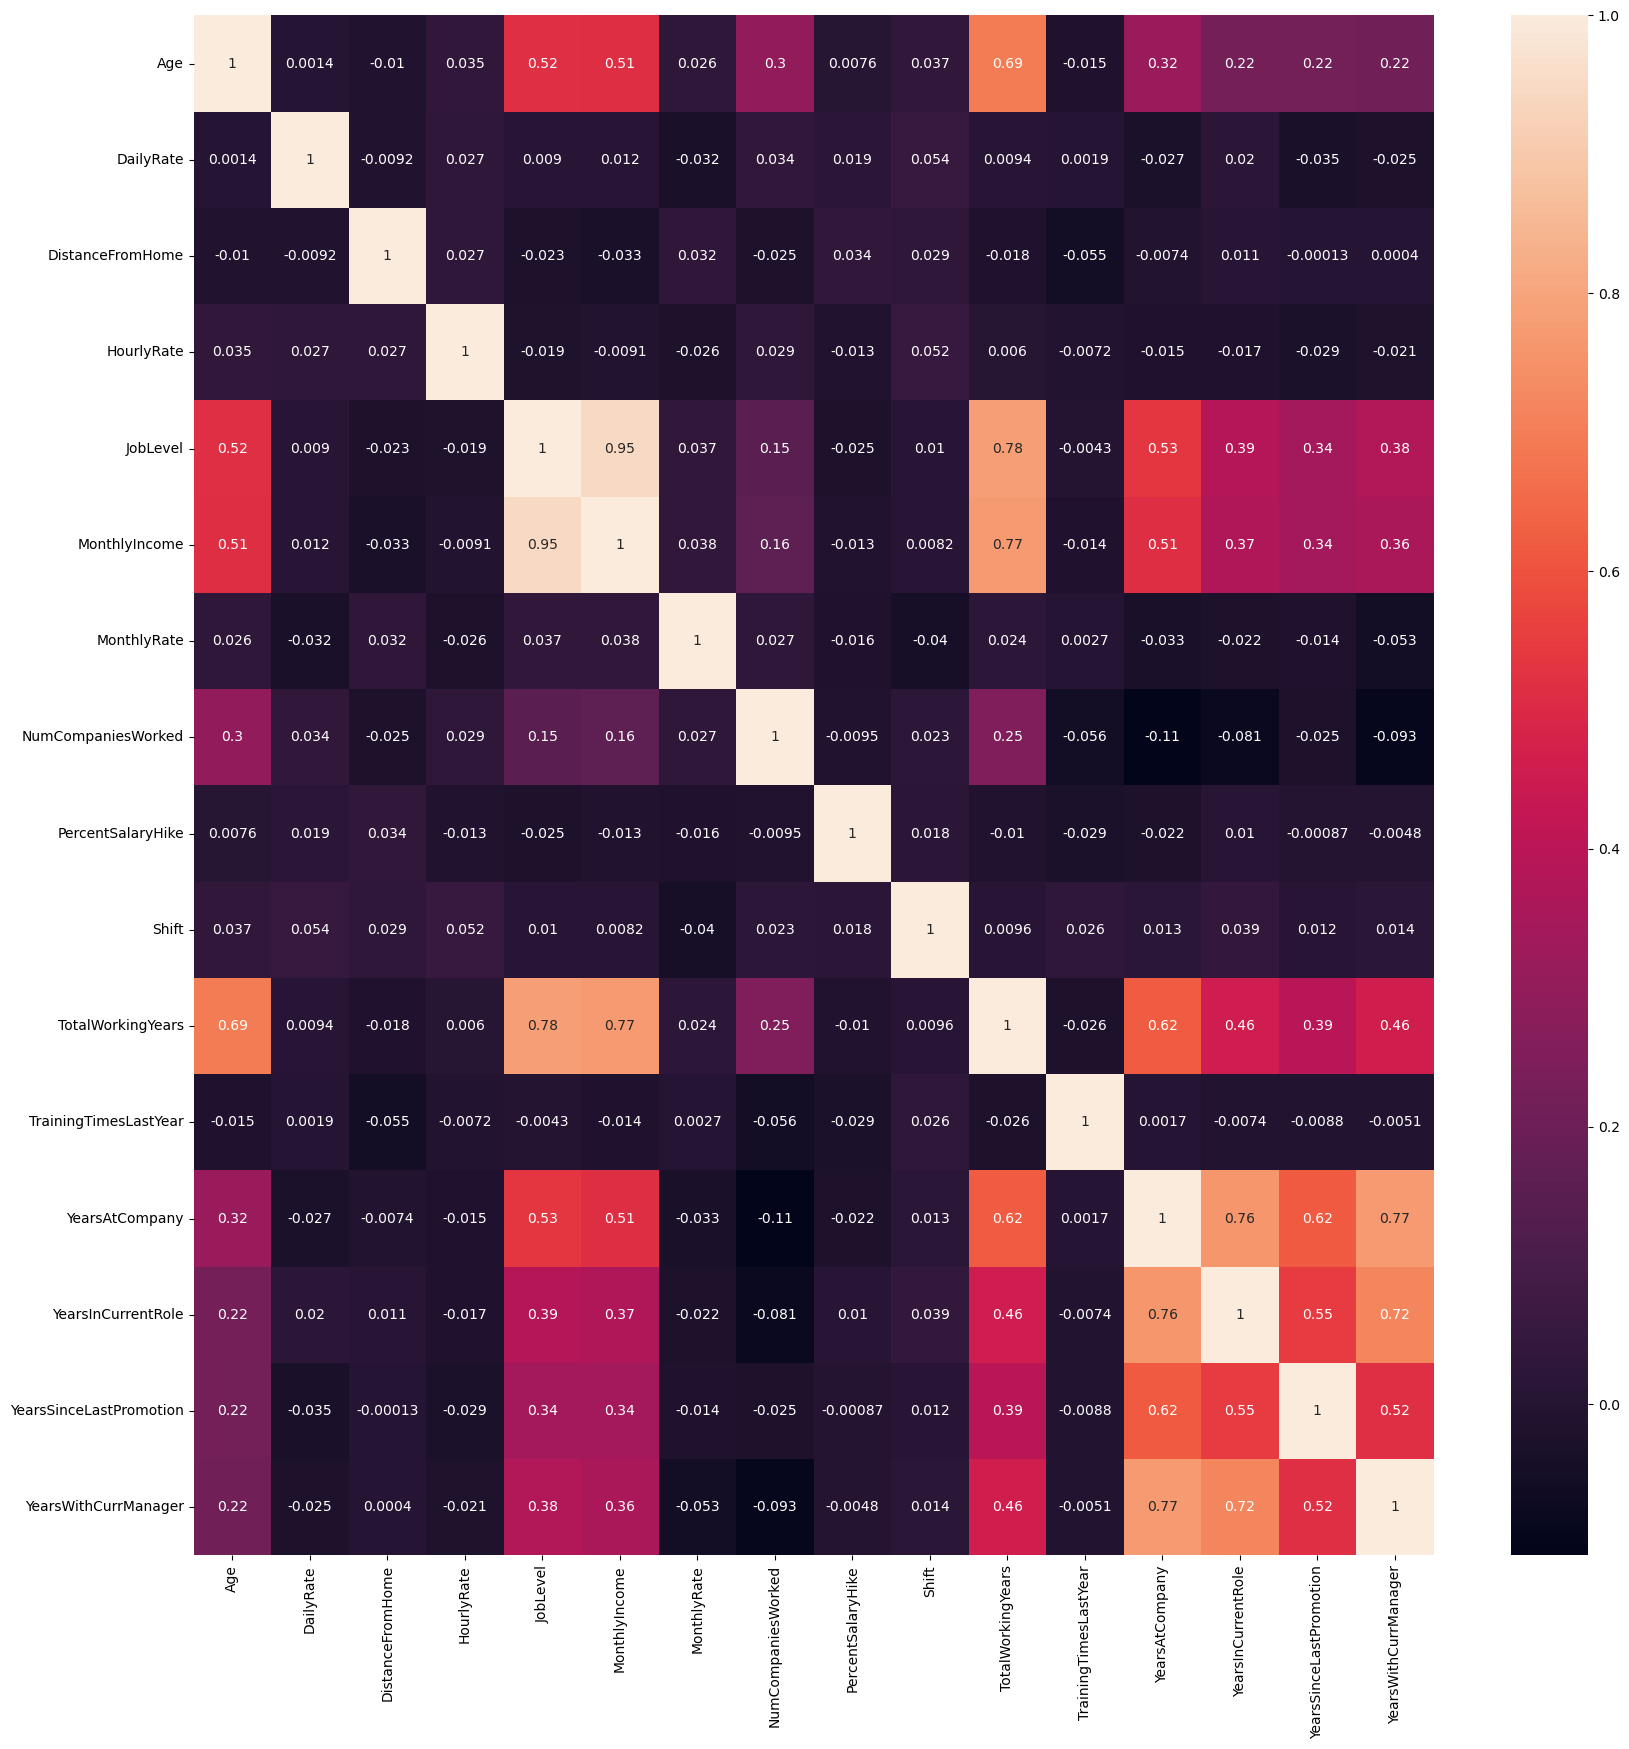

In [110]:
plt.figure(figsize=(20,20))
sns.heatmap(num_col.corr(),annot=True)#year_at_company and years_in_curentrole is correlated

In [111]:
num_col=df.select_dtypes(include=np.number)
num_col.shape

(1676, 16)

# VIF

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
vif_da=num_col
vif_data=pd.DataFrame()
vif_data['feature']=vif_da.columns

vif_data['VIF']=[variance_inflation_factor(vif_da.values,i)for i in range(len(vif_da.columns))]
print(vif_data)

                    feature        VIF
0                       Age  26.546925
1                 DailyRate   4.765269
2          DistanceFromHome   2.270137
3                HourlyRate   9.888736
4                  JobLevel  44.610222
5             MonthlyIncome  31.179340
6               MonthlyRate   4.719139
7        NumCompaniesWorked   2.664498
8         PercentSalaryHike  13.591988
9                     Shift   1.910158
10        TotalWorkingYears  13.422314
11    TrainingTimesLastYear   5.341203
12           YearsAtCompany  10.475857
13       YearsInCurrentRole   6.491277
14  YearsSinceLastPromotion   2.443699
15     YearsWithCurrManager   6.542903


In [114]:
num_col.drop(['Age','JobLevel','MonthlyIncome','TotalWorkingYears','YearsAtCompany','PercentSalaryHike'],inplace=True,axis=1)

In [115]:
vif_da=num_col
vif_data=pd.DataFrame()
vif_data['feature']=vif_da.columns

vif_data['VIF']=[variance_inflation_factor(vif_da.values,i)for i in range(len(vif_da.columns))]
print(vif_data)

                   feature       VIF
0                DailyRate  4.402603
1         DistanceFromHome  2.196772
2               HourlyRate  7.593819
3              MonthlyRate  4.254508
4       NumCompaniesWorked  2.098095
5                    Shift  1.885989
6    TrainingTimesLastYear  4.749247
7       YearsInCurrentRole  5.466894
8  YearsSinceLastPromotion  2.200811
9     YearsWithCurrManager  5.075943


In [116]:
df.drop(['Age','JobLevel','MonthlyIncome','TotalWorkingYears','YearsAtCompany','PercentSalaryHike'],inplace=True,axis=1)

In [117]:
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,Shift,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,No,Travel_Rarely,1102,Cardiology,1,College,Life Sciences,Medium,Female,94,High,Nurse,Very High,Single,19479,8,Yes,Excellent,Low,0,0,Bad,4,0,5
1,No,Travel_Frequently,279,Maternity,8,Below College,Life Sciences,High,Male,61,Medium,Other,Medium,Married,24907,1,No,Outstanding,Very High,1,3,Better,7,1,7
2,Yes,Travel_Rarely,1373,Maternity,2,College,Other,Very High,Male,92,Medium,Nurse,High,Single,2396,6,Yes,Excellent,Medium,0,3,Better,0,0,0
3,No,Travel_Frequently,1392,Maternity,3,Master,Life Sciences,Very High,Female,56,High,Other,High,Married,23159,1,Yes,Excellent,High,0,3,Better,7,3,0
4,No,Travel_Rarely,591,Maternity,2,Below College,Medical,Low,Male,40,High,Nurse,Medium,Married,16632,9,No,Excellent,Very High,1,3,Better,2,2,2


In [118]:
df.shape

(1676, 25)

In [119]:
from sklearn.preprocessing import LabelEncoder

In [120]:
le=LabelEncoder()

In [121]:
df.Attrition=le.fit_transform(df.Attrition)
df.Gender=le.fit_transform(df.Gender)
df.EducationField=le.fit_transform(df.EducationField)

In [122]:
p=pd.get_dummies(df.BusinessTravel,drop_first=True)
o=pd.get_dummies(df.Department,drop_first=True)
i=pd.get_dummies(df.JobRole,drop_first=True)
u=pd.get_dummies(df.OverTime,drop_first=True)
y=pd.get_dummies(df.MaritalStatus,drop_first=True)
e=pd.get_dummies(df.WorkLifeBalance,drop_first=True)
w=pd.get_dummies(df.RelationshipSatisfaction,drop_first=True)
q=pd.get_dummies(df.PerformanceRating,drop_first=True)
l=pd.get_dummies(df.JobSatisfaction,drop_first=True)
k=pd.get_dummies(df.Education,drop_first=True)
j=pd.get_dummies(df.EnvironmentSatisfaction,drop_first=True)
h=pd.get_dummies(df.JobInvolvement,drop_first=True)


In [123]:
df=pd.concat([p,o,i,u,y,e,w,q,l,k,j,h,df],axis=1)

In [124]:
df.drop(['BusinessTravel','Department','JobRole','OverTime','MaritalStatus','Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance'],axis=1,inplace=True)

In [125]:
df.head()

,Travel_Frequently,Travel_Rarely,Maternity,Neurology,Administrative,Nurse,Other,Therapist,Yes,Married,Single,Best,Better,Good,Low,Medium,Very High,Outstanding,Low,Medium,Very High,Below College,College,Doctor,Master,Low,Medium,Very High,Low,Medium,Very High,Attrition,DailyRate,DistanceFromHome,EducationField,Gender,HourlyRate,MonthlyRate,NumCompaniesWorked,Shift,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1102,1,1,0,94,19479,8,0,0,4,0,5
1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,279,8,1,1,61,24907,1,1,3,7,1,7
2,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1373,2,4,1,92,2396,6,0,3,0,0,0
3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1392,3,1,0,56,23159,1,0,3,7,3,0
4,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,591,2,3,1,40,16632,9,1,3,2,2,2


## Smote

In [126]:
df.Attrition.value_counts()

0    1477
1     199
Name: Attrition, dtype: int64

In [127]:
no=df[df.Attrition==0]
yes=df[df.Attrition==1]

from sklearn.utils import resample

over=resample(yes,replace=True,n_samples=len(no),random_state=23)

dfsmote=pd.concat([no,over])
dfsmote.Attrition.value_counts()

0    1477
1    1477
Name: Attrition, dtype: int64

# 5. Data Preprocessing

In [128]:

x = dfsmote.drop("Attrition",axis = 1)
y =  dfsmote["Attrition"]

In [129]:
x

,Travel_Frequently,Travel_Rarely,Maternity,Neurology,Administrative,Nurse,Other,Therapist,Yes,Married,Single,Best,Better,Good,Low,Medium,Very High,Outstanding,Low,Medium,Very High,Below College,College,Doctor,Master,Low,Medium,Very High,Low,Medium,Very High,DailyRate,DistanceFromHome,EducationField,Gender,HourlyRate,MonthlyRate,NumCompaniesWorked,Shift,TrainingTimesLastYear,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1102,1,1,0,94,19479,8,0,0,4,0,5
1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0,279,8,1,1,61,24907,1,1,3,7,1,7
3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1392,3,1,0,56,23159,1,0,3,7,3,0
4,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,591,2,3,1,40,16632,9,1,3,2,2,2
5,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1005,2,1,1,79,11864,0,0,2,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,303,27,1,1,84,13492,1,0,2,7,7,7
456,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1306,5,2,1,69,8059,1,0,3,0,0,0
1080,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,676,9,1,1,86,21831,3,0,3,4,1,0
51,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1434,5,5,1,50,11179,1,0,3,2,2,2


In [130]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV


In [131]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=20)

# Logistic Regression

In [145]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=30,solver='liblinear')
lr.fit(xtrain,ytrain)

LogisticRegression(random_state=30, solver='liblinear')

In [146]:
p_x=lr.predict(xtest)

In [147]:
accuracy_score(ytest,p_x)

0.874859075535513

In [148]:
print(metrics.classification_report(ytest, p_x, labels = [0,1,2]))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       447
           1       0.85      0.91      0.88       440
           2       0.00      0.00      0.00         0

   micro avg       0.87      0.87      0.87       887
   macro avg       0.58      0.58      0.58       887
weighted avg       0.88      0.87      0.87       887



In [149]:
print(metrics.confusion_matrix(ytest, p_x))


[[376  71]
 [ 40 400]]


In [150]:
prob=lr.predict_proba(xtest)
prob

array([[9.66131648e-03, 9.90338684e-01],
       [9.99660374e-01, 3.39625844e-04],
       [6.08775927e-02, 9.39122407e-01],
       ...,
       [1.34657557e-01, 8.65342443e-01],
       [1.44079740e-01, 8.55920260e-01],
       [1.59564391e-01, 8.40435609e-01]])

In [151]:
#roc
fp,tp,th=roc_curve(ytest,prob[:,1])
roc_auc = auc(fp, tp) 
print(roc_auc)

0.9396532438478746


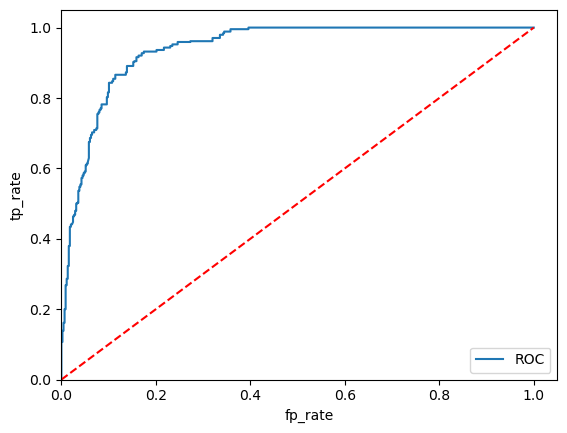

In [152]:
plt.figure()
plt.plot(fp,tp,label='ROC')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('fp_rate')
plt.ylabel('tp_rate')
plt.legend(loc='lower right')
plt.show()

# RandomForest

In [170]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
rf=RandomForestClassifier(random_state=30)
rf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=30)

In [175]:
params={
    'max_features':['sqrt',0.25],
    'min_samples_split':[2,4,6],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8],
    'bootstrap': [True, False]
}

In [176]:
gd=GridSearchCV(rf,params)

In [177]:
gd.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(random_state=30),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 0.25],
                         'min_samples_split': [2, 4, 6]})

In [178]:
gd.best_estimator_


RandomForestClassifier(bootstrap=False, max_depth=8, random_state=30)

In [179]:
rf=RandomForestClassifier(min_samples_split=4, n_estimators=1000,bootstrap=False, max_depth=8, random_state=30)

In [180]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=False, max_depth=8, min_samples_split=4,
                       n_estimators=1000, random_state=30)

In [181]:
y_pred_rand=rf.predict(xtest)

In [182]:
confusion_matrix(ytest,y_pred_rand)

array([[421,  26],
       [  6, 434]], dtype=int64)

In [183]:
accuracy_score(ytest,y_pred_rand)

0.963923337091319

In [184]:
print(classification_report(ytest,y_pred_rand))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       447
           1       0.94      0.99      0.96       440

    accuracy                           0.96       887
   macro avg       0.96      0.96      0.96       887
weighted avg       0.96      0.96      0.96       887



In [185]:
prob=rf.predict_proba(xtest)
prob

array([[0.097911  , 0.902089  ],
       [0.97044046, 0.02955954],
       [0.2603763 , 0.7396237 ],
       ...,
       [0.20940971, 0.79059029],
       [0.08977979, 0.91022021],
       [0.37197259, 0.62802741]])

In [186]:
#roc
fp,tp,th=roc_curve(ytest,prob[:,1])
roc_auc = auc(fp, tp) 
print(roc_auc)

0.9939597315436242


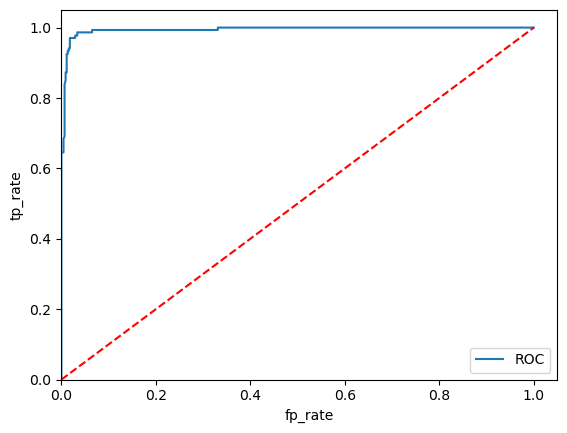

In [187]:
plt.figure()
plt.plot(fp,tp,label='ROC')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('fp_rate')
plt.ylabel('tp_rate')
plt.legend(loc='lower right')
plt.show()

# DecisionTree

In [154]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
dt=DecisionTreeClassifier(random_state=20)

In [156]:
parm={'max_depth':[10,20,30],
      'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random'],
    'max_leaf_nodes': [None, 5, 10, 15],
    'min_impurity_decrease': [0, 0.1, 0.2, 0.3]
     }

In [157]:
grid=GridSearchCV(dt,parm)

In [158]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=20),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 5, 10, 15],
                         'min_impurity_decrease': [0, 0.1, 0.2, 0.3],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'splitter': ['best', 'random']})

In [159]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=20, min_impurity_decrease=0, random_state=20,
                       splitter='random')

In [161]:
dt=DecisionTreeClassifier(max_depth=20, min_impurity_decrease=0, random_state=20,
                       splitter='random')

In [162]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=20, min_impurity_decrease=0, random_state=20,
                       splitter='random')

In [163]:
y_pred_dec=dt.predict(xtest)

In [164]:
confusion_matrix(ytest,y_pred_dec)

array([[404,  43],
       [  3, 437]], dtype=int64)

In [165]:
accuracy_score(ytest,y_pred_dec)

0.9481397970687712

In [166]:
#classification Report
print(classification_report(ytest,y_pred_dec))

              precision    recall  f1-score   support

           0       0.99      0.90      0.95       447
           1       0.91      0.99      0.95       440

    accuracy                           0.95       887
   macro avg       0.95      0.95      0.95       887
weighted avg       0.95      0.95      0.95       887



In [167]:
prob=dt.predict_proba(xtest)
prob

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [168]:
#roc
fp,tp,th=roc_curve(ytest,prob[:,1])
roc_auc = auc(fp, tp) 
print(roc_auc)

0.9481950376245678


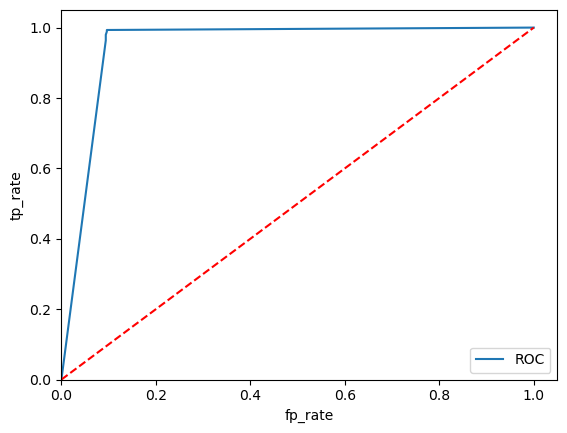

In [169]:
plt.figure()
plt.plot(fp,tp,label='ROC')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('fp_rate')
plt.ylabel('tp_rate')
plt.legend(loc='lower right')
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn import svm

In [ ]:
#SVC - Suppot Vector Classifier
svc =svm.SVC(class_weight='balanced',probability=True) 
td_svc = svc.fit(xtrain,ytrain)
td_svc.get_params()

In [ ]:
y_pred_lin = td_svc.predict(xtest)
len(y_pred_lin)

In [ ]:
print('accuracy',accuracy_score(ytest,y_pred_lin))

In [ ]:
print(confusion_matrix(ytest,y_pred_lin))

In [ ]:
print(classification_report(ytest,y_pred_lin))

# Naive Bayes

In [226]:
from  sklearn.naive_bayes import GaussianNB

In [227]:
gn=GaussianNB()

In [228]:
gn.fit(xtrain,ytrain)

GaussianNB()

In [229]:
y_pred_nb=gn.predict(xtest)

In [230]:
accuracy_score(ytest,y_pred_nb)

0.762119503945885

# KNN

In [190]:
from sklearn.neighbors import KNeighborsClassifier

In [191]:
params={'n_neighbors':np.arange(1,40,1),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}

In [192]:
knn= KNeighborsClassifier()

In [193]:
gd=GridSearchCV(knn,params)

In [194]:
gd.fit(xtrain,ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [195]:
gd.best_params_

{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

In [198]:
knn=KNeighborsClassifier(n_neighbors=2, p=2, weights= "distance")
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [199]:
y_pred_knn=knn.predict(xtest)

In [200]:
#accuracy score
accuracy_score(ytest,y_pred_knn)

0.915445321307779

In [201]:
print(classification_report(ytest,y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       447
           1       0.86      0.99      0.92       440

    accuracy                           0.92       887
   macro avg       0.92      0.92      0.92       887
weighted avg       0.92      0.92      0.92       887



In [202]:
confusion_matrix(ytest,y_pred_knn)

array([[377,  70],
       [  5, 435]], dtype=int64)

# Adaboost

In [203]:
from sklearn.ensemble import AdaBoostClassifier


In [204]:
model = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
model.fit(xtrain, ytrain)


AdaBoostClassifier()

In [205]:
param_grid = {
    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3)],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1],
}

In [210]:
gd=GridSearchCV(model,param_grid)

In [211]:
gd.fit(xtrain,ytrain)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=1),
                                            DecisionTreeClassifier(max_depth=2),
                                            DecisionTreeClassifier(max_depth=3)],
                         'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]})

In [213]:
gd.best_params_

{'base_estimator': DecisionTreeClassifier(max_depth=3),
 'learning_rate': 1,
 'n_estimators': 200}

In [214]:
model = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=3),
 learning_rate= 1,
 n_estimators= 200)
model.fit(xtrain, ytrain)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1, n_estimators=200)

In [215]:
y_pred = model.predict(xtest)

In [216]:
accuracy_score(ytest, y_pred)

0.9740698985343855

# Gradient boosting

In [217]:
from sklearn.ensemble import GradientBoostingClassifier

In [218]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(xtrain, ytrain)

GradientBoostingClassifier(random_state=42)

In [219]:
param_grid = {
    'learning_rate': [0.1, 0.5, 1],
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
}

In [220]:
gd=GridSearchCV(gb_clf,param_grid)

In [221]:
gd.fit(xtrain,ytrain)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.5, 1], 'max_depth': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 200]})

In [222]:
gd.best_params_

{'learning_rate': 0.5,
 'max_depth': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [223]:
gb_clf = GradientBoostingClassifier(learning_rate= 0.5,
 max_depth=4,
 min_samples_leaf= 4,
 min_samples_split= 2,
 n_estimators= 200)
gb_clf.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.5, max_depth=4, min_samples_leaf=4,
                           n_estimators=200)

In [224]:
y_pred = gb_clf.predict(xtest)

In [225]:
accuracy_score(ytest, y_pred)

0.9740698985343855

### Accuracy Score